## Classifying Iris Species with Support Vector Classifier

**About Dataset:**
The Iris dataset, a classic dataset in machine learning, comprises measurements of iris flowers' sepal and petal dimensions. It contains 150 samples, with each sample representing one iris flower. The dataset includes four features: sepal length, sepal width, petal length, and petal width. Additionally, each sample is labeled with the species of iris it belongs to: Setosa, Versicolor, or Virginica.

**Objective:**
The primary objective of this project is to develop a support vector classifier (SVC) model capable of accurately classifying iris flowers into their respective species based on their sepal and petal measurements. Leveraging the SVC algorithm, the project aims to achieve high classification performance and provide insights into the effectiveness of support vector machines in handling multi-class classification tasks like iris species classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris.duplicated().sum()

1

In [6]:
duplicate_values = iris[iris.duplicated(keep=False)]
duplicate_values

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [7]:
iris=iris.drop_duplicates()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris['species']=labelencoder.fit_transform(iris['species'])
iris

C:\Users\admin\AppData\Local\Temp\ipykernel_6832\4119614631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['species']=labelencoder.fit_transform(iris['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
y=iris.species
X=iris.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [16]:
# Making predictions on training set
y_train_pred = svm_model.predict(X_train)

# Making predictions on testing set
y_test_pred = svm_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9831932773109243
Testing Set Accuracy: 0.9666666666666667


In conclusion, the support vector classifier (SVC) model demonstrates excellent performance in classifying iris species, achieving a high accuracy of 98.32% on the training set and 96.67% on the testing set. These results indicate that the model generalizes well to unseen data, highlighting its effectiveness in accurately categorizing iris flowers based on their sepal and petal measurements. 

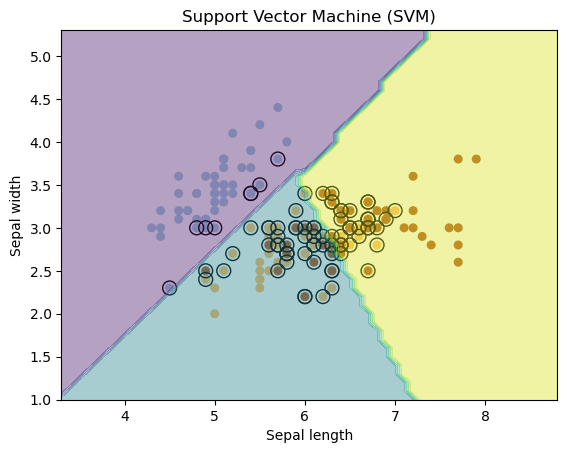

In [29]:
# Selecting the first two features for visualization
X_2d = X[['sepal_length', 'sepal_width']].values

# Fit SVM model using only the first two features
svm_model_2d = SVC(kernel='linear', random_state=42)
svm_model_2d.fit(X_2d, y)

# Extract support vectors
support_vectors_2d = svm_model_2d.support_vectors_

# Plot decision boundary
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

# Plotting decision regions
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Support Vector Machine (SVM)')
plt.show()